<center><h1><u> Global Terrorism Project </u></h1></center>

# _Part 1: **EDA**_
___

## // Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import shuffle

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('mako')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## // Reading in the data

In [2]:
df = pd.read_csv('./data/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## // Doing some poking around to see ( high–level ) what we've got

In [4]:
df.shape

(170350, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# We want to take a look at EVERYTHING we have first
pd.options.display.max_columns = 135

In [7]:
pd.options.display.max_rows = 135

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [9]:
columns = df.columns
columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [10]:
# Want to check and make sure we don't have any glaring dtype irregularities
# Most location ones seem to have a numerical code AND a text entry

df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr               int64
alternative           float64
alternative_txt        object
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [11]:
df.approxdate.isnull().value_counts()

True     162886
False      7464
Name: approxdate, dtype: int64

In [12]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            162886
extended                   0
resolution            168131
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
location              122376
summary                66138
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           164720
attacktype2_txt       164720
attacktype3           169976
attacktype3_txt       169976
targtype1     

In [13]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['nkill'].max(),'that took place in',df.loc[df['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


## // Visualizing lots of our data

> ### Let's take a look at the breakdown of the 'attacktype1_txt' category:

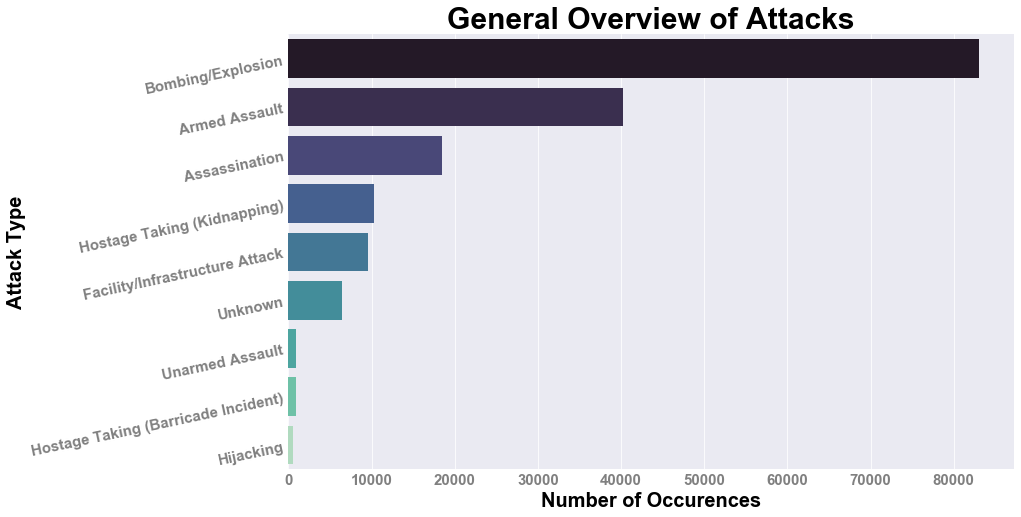

In [14]:
plt.figure(figsize=(13,8))
ax = sns.barplot(x       = df.attacktype1_txt.value_counts().values,
                 y       = df.attacktype1_txt.value_counts().index,
                 data    = df,
                 palette = 'mako')
ax.set_xlabel('Number of Occurences',
              fontsize = 20,
              weight   = 'bold',
              color    = 'black')
ax.set_ylabel('Attack Type',
              fontsize = 20,
              weight   = 'bold',
              color    = 'black')
plt.title('General Overview of Attacks',
             fontsize = 30,
             weight   = 'extra bold',
             color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.savefig('Attack_Type_1_Overview_Final.png', bbox_inches='tight', pad_inches=.5);

___
> ### And now at the total number of attacks over time:

In [15]:
# Getting the number of events in one year:

df.loc[df.iyear == 1970, :].shape[0]

651

In [16]:
# Now getting the number of attacks for each year in the database:

years_in_database = list(range(1970, 2017))
attacks_per_year = []

for year in years_in_database:
    number_of_attacks = df.loc[df.iyear == year, :].shape[0]
    attacks_per_year.append(number_of_attacks)


attacks_per_year[0:5]

[651, 470, 496, 473, 580]

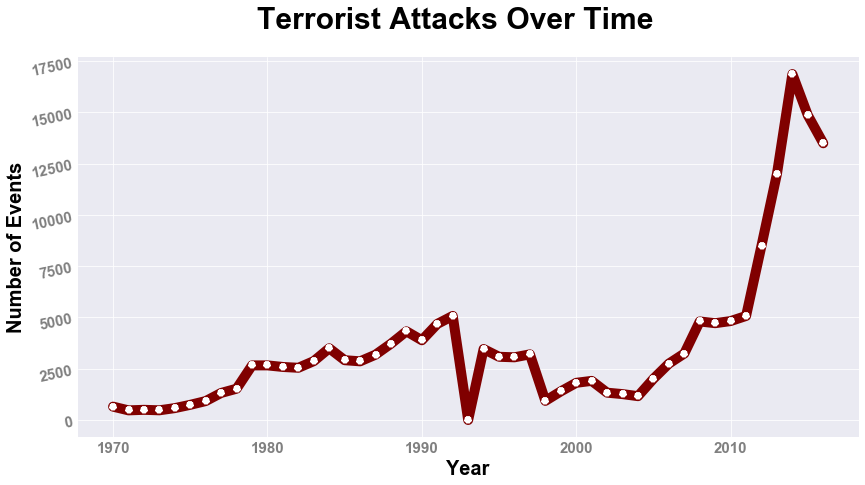

In [17]:
plt.figure(figsize=(14,7))
plt.suptitle('Terrorist Attacks Over Time',
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')
plt.xlabel('Year',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.ylabel('Number of Events',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.plot(years_in_database,
         attacks_per_year,
         color     = 'maroon',
         linewidth = 10,
         linestyle = '-',
         marker    = '*',
         mec       = 'white',
         mew       = 4);
plt.savefig('Attacks_Over_Time.png', bbox_inches='tight', pad_inches=.5);

> ### A different look at that:

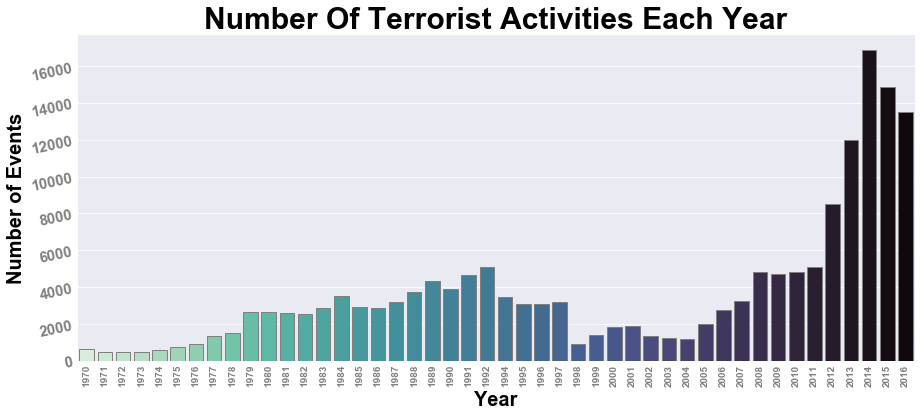

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',
              data=df,
              palette='mako_r',
              edgecolor='grey')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year', 
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')
plt.xlabel('Year',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.ylabel('Number of Events',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 10,
           color    = 'grey')
plt.savefig('Attacks_Over_Time_2.png', bbox_inches='tight', pad_inches=.5);

> ### Looking at a regional breakdown over time:

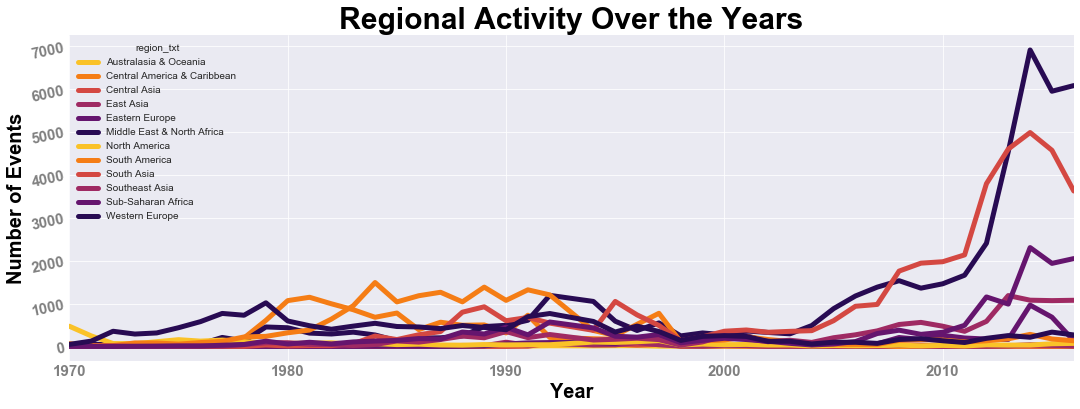

In [19]:
# plt.figure(figsize=(18,6))

terror_region = pd.crosstab(df.iyear, df.region_txt)
terror_region.plot(color=sns.color_palette('inferno_r'), lw = 5)

plt.title('Regional Activity Over the Years',
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')

plt.xlabel('Year',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.ylabel('Number of Events',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')

plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')

fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

plt.savefig('Regional_Activity_Over_Years.png', bbox_inches='tight', pad_inches=.5);

___
> ### Looking at a cumulative regional breakdown:

In [20]:
regional_occurences = df.region_txt.value_counts()

new_occurences = []
lesser_values = []

# Making sure our values don't bump into each other on the pie chart
for x in regional_occurences.values:
    if x > 1000:
        new_occurences.append(x)
    elif x < 1000:
        lesser_values.append(x)
new_occurences.append(sum(lesser_values))
new_occurences

[46511, 41497, 18762, 16307, 15491, 11453, 10340, 5031, 3346, 1612]

In [21]:
new_occurences = pd.Series(data=new_occurences, index=df.region_txt.value_counts().index[0:10])
new_occurences

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                       1612
dtype: int64

In [22]:
idx = new_occurences.index.values
idx[-1] = 'East Asia / Central Asia / Australasia & Oceania'
new_occurences.index = idx

In [23]:
print(len(new_occurences.index))
# Generating 12 explode values at evenly spaced intervals:
explode = np.arange(.06, 0, -.006)
explode_2 = (.04,0,0,0,0,0,0,0,0,0)
print(len(explode))
print(len(explode_2))

10
10
10


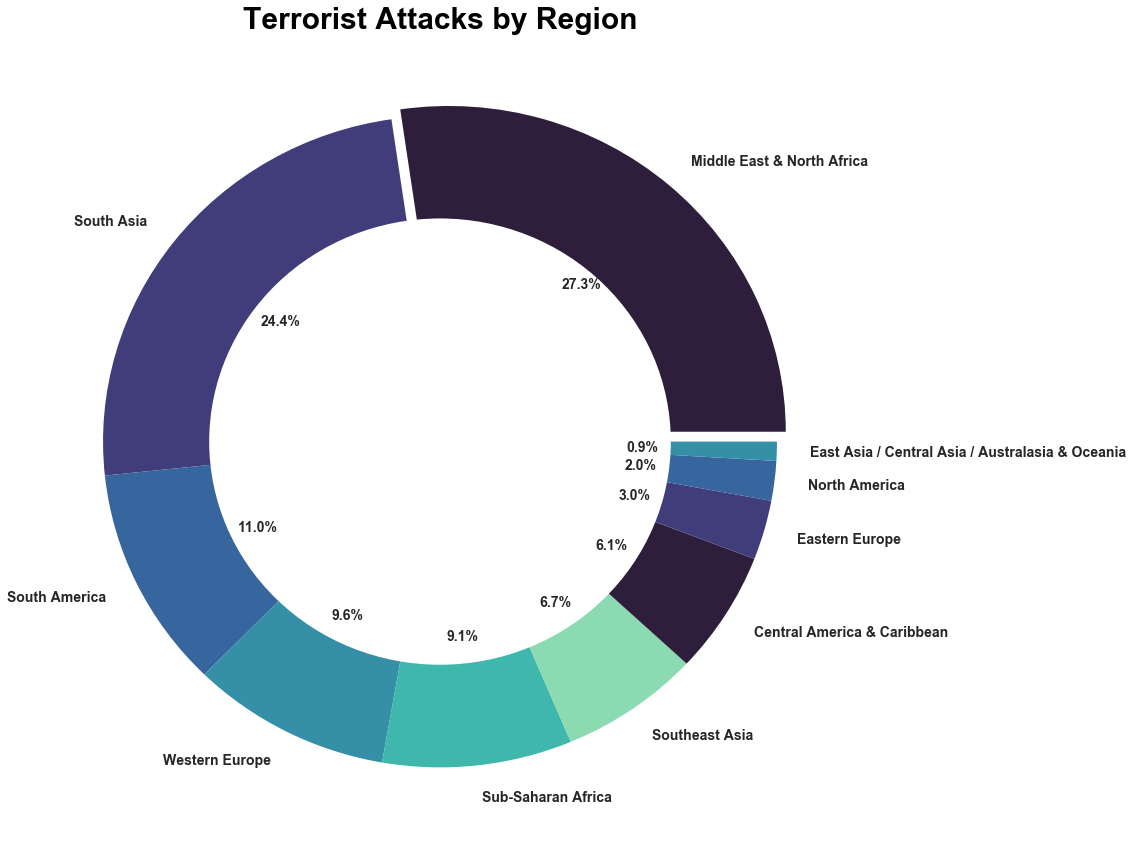

In [24]:
sns.set_palette('mako')

plt.figure(figsize=(12, 12))
plt.pie(new_occurences,
        labels     = new_occurences.index,
        explode    = (.04,0,0,0,0,0,0,0,0,0),
        autopct    = '%1.1f%%',
        shadow     = False,
        textprops = {'fontsize': 14, 'weight':'bold'})
plt.title('Terrorist Attacks by Region', 
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')

# Poor man's donut chart
centre_circle = plt.Circle((0,0),0.685,fc='white')

plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('Attacks_by_Region_donut.png', bbox_inches='tight', pad_inches=.5);

___
> ### One last look at regions and seeing what kind of attacks occur the most in each one:

In [25]:
df.shape

(170350, 135)

In [26]:
df.attacktype1_txt.value_counts().index

Index(['Bombing/Explosion', 'Armed Assault', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
       'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)',
       'Hijacking'],
      dtype='object')

In [27]:
sns.set_style('white')

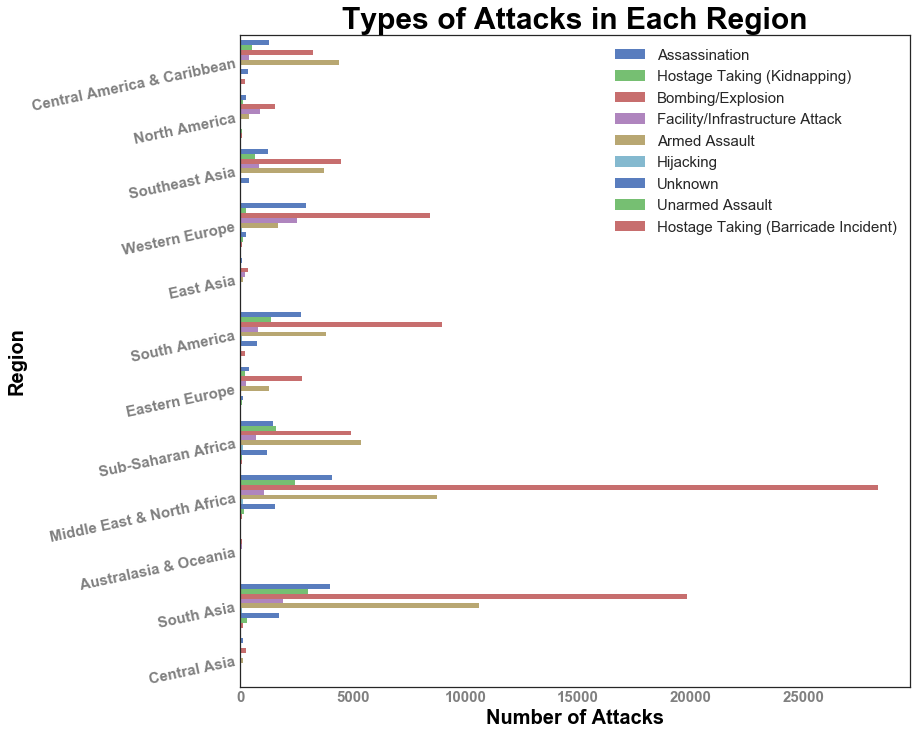

In [28]:
plt.figure(figsize=(12, 12))
sns.countplot(y='region_txt', 
              data=df, 
              hue='attacktype1_txt', 
              palette='muted')
plt.title('Types of Attacks in Each Region', 
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')
plt.xlabel('Number of Attacks',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.ylabel('Region',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.legend(loc =0, prop={'size': 15})
plt.savefig('Types_of_Attacks_in_each_Region.png', bbox_inches='tight', pad_inches=.5);

___
> ### Examining the groups responsible for the most attacks:

In [29]:
sns.set_style('darkgrid')

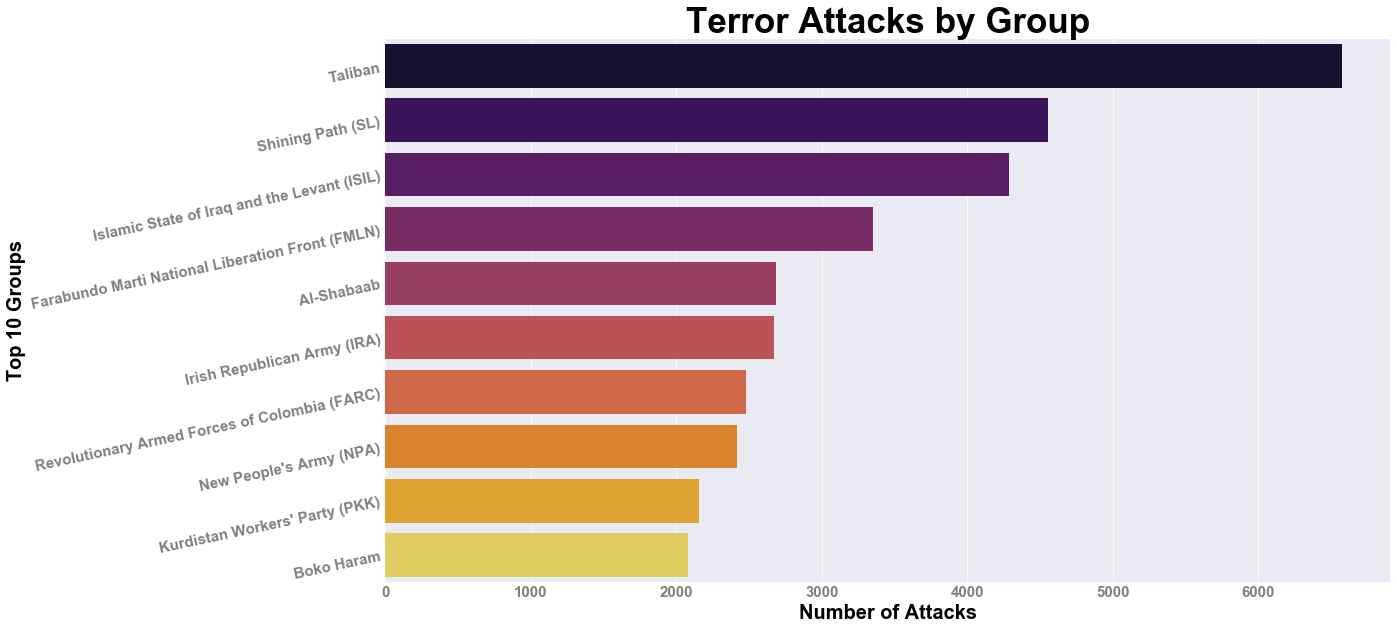

In [30]:
plt.figure(figsize=(18,10))
ax = sns.barplot(df['gname'].value_counts()[1:11].values,
                 df['gname'].value_counts()[1:11].index,
                 palette=('inferno'))
ax.set_xlabel('Number of Attacks',
              fontsize = 20,
              weight   = 'bold',
              color    = 'black')
ax.set_ylabel('Top 10 Groups',
              fontsize = 20,
              weight   = 'bold',
              color    = 'black')
plt.title('Terror Attacks by Group',
             fontsize = 35,
             weight   = 'extra bold',
             color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'extra bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.savefig('Terror_Attacks_by_Group.png', bbox_inches='tight', pad_inches=.5);

___
> ### Taliban attacks over time:

In [56]:
# Time allowing.

___
> ## [Global Terrorism Timeline in Tableau](https://public.tableau.com/views/GlobalTerrorismTimeline/Sheet1?:embed=y&:display_count=yes&publish=yes)
> Viewable below as well.

In [1]:
%%html

<div class='tableauPlaceholder' id='viz1522860288582' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 - 1,991 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gl&#47;GlobalTerrorismTimeline&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GlobalTerrorismTimeline&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gl&#47;GlobalTerrorismTimeline&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1522860288582');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


# _Part 2: **Bayesian Inference**_
___

Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.

I'm going to be comparing the deadliness of Taliban attacks and ISIL attacks using Bayesian inference. We want to know if the deadliness of one differs in a significant way than the other.

### // Looking at the deadliness of the Taliban compared to ISIL and see which one is worse:

In [33]:
# First making a deadliness metric based off numbers of killed and wounded

In [34]:
df_copy = df.copy()
df_copy.nkill.fillna(0, inplace=True)
df_copy.nkill.isnull().sum()

0

In [35]:
df_copy.nwound.fillna(0, inplace=True)
df_copy.nwound.isnull().sum()

0

In [36]:
df_copy['number_affected'] = df_copy['nkill'] + df_copy['nwound']
df_copy.number_affected.isnull().sum()

0

In [37]:
df_copy['deadliness'] = df_copy['nkill'] / df_copy['number_affected']
df_copy.deadliness.isnull().sum()

69656

In [38]:
df_copy.loc[df_copy.deadliness.isnull(), ['nwound', 'nkill', 'number_affected', 'deadliness']]

,nwound,nkill,number_affected,deadliness
1,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,NaN
9,0.0,0.0,0.0,NaN
10,0.0,0.0,0.0,NaN
11,0.0,0.0,0.0,NaN


In [39]:
df_copy.deadliness.fillna(0, inplace=True)
df_copy.deadliness.isnull().sum()

0

In [40]:
taliban_condensed = df_copy.loc[df_copy.gname == 'Taliban', ['eventid', 'iyear', 'imonth', 'iday','attacktype1_txt', 'latitude', 'longitude', 'nkill', 'nwound', 'number_affected', 'deadliness']]

isil_condensed = df_copy.loc[df_copy.gname == 'Islamic State of Iraq and the Levant (ISIL)', ['eventid', 'iyear', 'imonth', 'iday','attacktype1_txt', 'latitude', 'longitude', 'nkill', 'nwound', 'number_affected', 'deadliness']]

### // Building out model with pyMC3 to estimate the difference in deadliness between the Taliban and ISIL

In [41]:
taliban_deadliness = taliban_condensed.deadliness.values
isil_deadliness = isil_condensed.deadliness.values

print (taliban_deadliness.mean(), isil_deadliness.mean())

0.5101646721392277 0.412244224778717


In [42]:
prior_mean = df_copy.deadliness.mean()
prior_std = df_copy.deadliness.std()
print(prior_mean, prior_std)

0.3296278239956092 0.4256148880354269


In [43]:
with pm.Model() as model:
    
    taliban_mean = pm.Normal('taliban_mean', prior_mean, sd=0.5)
    isil_mean = pm.Normal('isil_mean', prior_mean, sd=0.5)
    
    taliban_std = pm.Gamma('taliban_std', mu=prior_std, sd=0.5)
    isil_std = pm.Gamma('isil_std', mu=prior_std, sd=0.5)
    
    taliban_rating = pm.Normal('taliban_rating', mu=taliban_mean, sd=taliban_std, observed=taliban_deadliness)
    isil_rating = pm.Normal('isil_rating', mu=isil_mean, sd=isil_std, observed=isil_deadliness)
    
    mean_delta = pm.Deterministic('mean_delta', taliban_mean - isil_mean)
    std_delta = pm.Deterministic('std_delta', taliban_std - isil_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((taliban_std**2 + isil_std**2)/2.))

In [44]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start=start, step=step, njobs=4)

/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
logp = -6,282.1, ||grad|| = 6,858: 100%|██████████| 11/11 [00:00<00:00, 64.82it/s] 
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [isil_std_log__, taliban_std_log__, isil_mean, taliban_mean]
100%|██████████| 50500/50500 [07:04<00:00, 118.96it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119271780>,
      dtype=object)

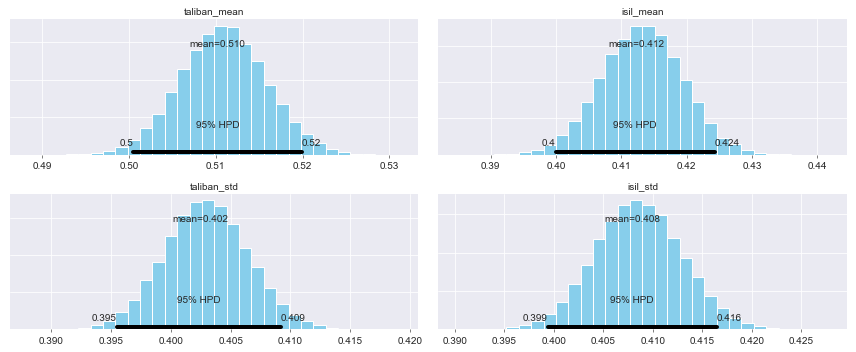

In [45]:
pm.plot_posterior(trace[5000::3],
                  varnames=['taliban_mean', 'isil_mean',
                            'taliban_std', 'isil_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c10ed30>,
      dtype=object)

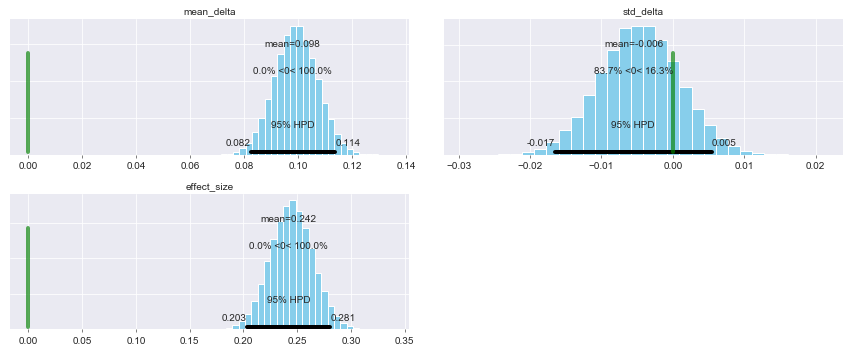

In [46]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

### // Analysis:
> Based on the above model, we can see that Taliban attacks overall are about 10% deadlier than ISIL attacks. Further evidence of this can be seen looking at the `mean_delta` graph. Since the `mean_delta` is about 0.10 away from 0, we can conclude with 95% confidence that there is a real difference between the two populations.

### // Next steps:
> This is looking at an all time view of attacks, which may or may not be the most accurate with regards to current relevancy. The Taliban have been active for a much longer time period than ISIL, so a good additional next step would be to break these (or other groups to compare) into a narrower time frame.

# _Part 3: **1993**_
___

The year 1993 is missing from the dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on attacktype1 bombings (category 3, as per the codebook).

Once we've created a methodology and imputed the number of bombings in 1993, we'll apply the methodology to OTHER attack categories. (Bonus opportunity: turn the method into a pipeline. Use that pipeline to fill in other missing attack values.)

In [47]:
bombings_df = df.loc[df.attacktype1 == 3, :]

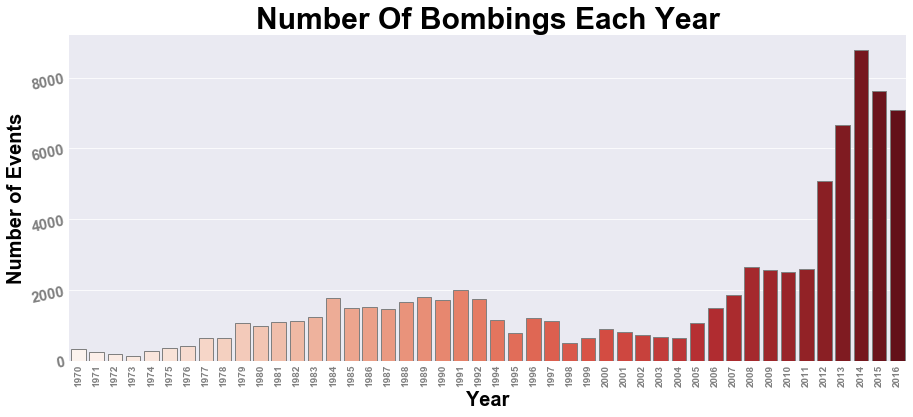

In [48]:
plt.subplots(figsize=(15,6))
sns.countplot(bombings_df.iyear,
              palette='Reds',
              edgecolor='grey')
plt.xticks(rotation=90)
plt.title('Number Of Bombings Each Year', 
          fontsize  = 30,
          weight    = 'extra bold',
          color     = 'black')
plt.xlabel('Year',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.ylabel('Number of Events',              
           fontsize = 20,
           weight   = 'bold',
           color    = 'black')
plt.yticks(rotation = 12, 
           weight   = 'bold', 
           fontsize = 15,
           color    = 'grey')
plt.xticks(weight   = 'bold', 
           fontsize = 10,
           color    = 'grey')
plt.savefig('Bombings_Over_Time.png', bbox_inches='tight', pad_inches=.5);

### From http://start.umd.edu/gtd/downloads/Codebook.pdf the total number of attacks in 1993 (based on Appendix II is **•4954•**

### // As a basic look, I'll take the proportion of bombings compared to total attacks in 1992 and 1994 and apply that proportion to 4954 (which seems like a reasonable estimate based on my graph of total attacks over the years).

In [49]:
bomb_prop_92 = df[df.iyear == 1992].attacktype1.value_counts(normalize=True)[3]
bomb_prop_94 = df[df.iyear == 1994].attacktype1.value_counts(normalize=True)[3]
bomb_prop_93 = (bomb_prop_92 + bomb_prop_94) / 2
bomb_prop_93

0.33801389818539435

In [50]:
print('I estimate there were around:', round(bomb_prop_93 * 4954), 'bombings/explosions in 1993.')

I estimate there were around: 1675.0 bombings/explosions in 1993.


In [51]:
# The above number seems like a realistic estimate for the total number of bombings based on what we see in the 
# above graph.

### // Let's see if we can't make a little loop to repeat the same process for other attack types:

In [52]:
attack_types_list = list(df.attacktype1_txt.unique())

In [53]:
estimated_numbers = []
for category in attack_types_list:
    cat_prop_92 = df[df.iyear == 1992].attacktype1_txt.value_counts(normalize=True)[category]
    cat_prop_94 = df[df.iyear == 1994].attacktype1_txt.value_counts(normalize=True)[category]
    cat_prop_93 = (cat_prop_92 + cat_prop_94) / 2
    est_number = round(cat_prop_93 * 4954)
    estimated_numbers.append(est_number)
estimated_numbers

[1095.0, 206.0, 1675.0, 366.0, 1234.0, 38.0, 238.0, 67.0, 35.0]

In [54]:
sum(estimated_numbers)

4954.0

In [55]:
estimations_1993 = dict(zip(attack_types_list, estimated_numbers))
estimations_1993

{'Armed Assault': 1234.0,
 'Assassination': 1095.0,
 'Bombing/Explosion': 1675.0,
 'Facility/Infrastructure Attack': 366.0,
 'Hijacking': 38.0,
 'Hostage Taking (Barricade Incident)': 35.0,
 'Hostage Taking (Kidnapping)': 206.0,
 'Unarmed Assault': 67.0,
 'Unknown': 238.0}

### // Analysis:
> I think these numbers are fairly reasonable. Although the data isn't perfectly recorded in the codebook, the **4954** number represents the best efforts from those in charge of maintaining the dataset. For the most part, we can see from one of our vizzes wayyyyy up there that up until 2010, there weren't many drastic changes in trends of overall attacks. That being said, this method would have very likely have given us a bad estimate for 2014, since the total number of attacks was far higher than either year that came before or after it.

### // Next steps:
> In the future, I'd like to explore other, more sophisticated approaches for imputing this data. All things considered though, I think imputing ratios from nearest neighbors is a fairly rational way to go about it.

# _Part 4: **Brief Project Reflections**_
___

### EDA: This project presented a unique opportunity as far as EDA by visualization goes. With a dataset as robust and segmented as this, you could come up with compelling visualizations for nearly any category that you wanted to drill down into.

### Continued Work: Because of that robustness, and because of my interest in the topic (much of my undergrad work focused around this), I plan to continue to explore this dataset for some time. I know I've only begun to scratch the surface with the unique insights I can glean from it. I'd also like to explore more complex models for inferring 1993 information (time permitting).